<a href="https://colab.research.google.com/github/sckgn/FinalYearProject_ML/blob/main/10_foldCVFemale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Load Data**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [2]:
asd_2018_df = pd.read_csv('dataset_2018.csv')

## **Data preparation**

In [3]:
asd_2018_df.rename(columns={'Class/ASD Traits ':'ASD_Traits'}, inplace=True)

In [4]:
fem = asd_2018_df[asd_2018_df['Sex']=='f']

In [5]:
fem = fem.drop(['Case_No', 'Qchat-10-Score','Who completed the test','Ethnicity','Sex'], axis=1)

### **Duplicate Samples**

In [6]:
duplicate_rows_f = fem.duplicated()

In [7]:
duplicate_rows_f.value_counts()

False    275
True      44
dtype: int64

In [8]:
duplicate_rows_m = asd_2018_df.duplicated()

In [9]:
duplicate_rows_m.value_counts()

False    1054
dtype: int64

##**Train-test split** 

In [10]:
from sklearn.model_selection import train_test_split

X = fem.drop("ASD_Traits", axis=1)
y = fem["ASD_Traits"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [11]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

encoder = OrdinalEncoder()
y_encoder = LabelEncoder()
scaler = MinMaxScaler()

age = ['Age_Mons']
char_vals = ['Jaundice','Family_mem_with_ASD']
target = ['ASD_Traits']

### **Pre-processing**

In [12]:
X_train[age] = scaler.fit_transform(X_train[age].values.reshape(-1,1))
X_test[age] = scaler.transform(X_test[age].values.reshape(-1,1))
for c in char_vals:
  X_train[c] = encoder.fit_transform(X_train[c].values.reshape(-1,1))
  X_test[c] = encoder.transform(X_test[c].values.reshape(-1,1))
y_train = y_encoder.fit_transform(y_train.values.ravel())
y_test = y_encoder.transform(y_test.values.ravel())

In [13]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

metrics ={'accuracy': make_scorer(accuracy_score),
          'precision': make_scorer(precision_score),
          'recall' : make_scorer(recall_score),
          'f1_score' : make_scorer(f1_score)}

## **Evaluation functions**

In [14]:
from sklearn.model_selection import cross_validate

def cross_validation_results(model, predictors, target):
  results = cross_validate(model, predictors, target, scoring = metrics, return_train_score=False, cv=10)

  print("Mean Test Precision: ", results['test_precision'].mean())
  print("Mean Test Recall: ", results['test_recall'].mean())
  print("Mean Test F1: ", results['test_f1_score'].mean())
  print("Accuracy: ", results['test_accuracy'].mean())
  ConfusionMatrixDisplay.from_estimator(model, predictors, target)

In [15]:
def evaluate_on_test(model, predictors, target):
  predictions = model.predict(predictors)
  print("Accuracy: ", accuracy_score(target, predictions))
  print("Precision: ", precision_score(target, predictions))
  print("Recall: ", recall_score(target, predictions))
  print("F1: ", f1_score(target, predictions))
  ConfusionMatrixDisplay.from_predictions(target, predictions)

## **Logistic Regression**

In [16]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=1000.0,random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1000.0, random_state=42)

Mean Test Precision:  0.9928571428571429
Mean Test Recall:  1.0
Mean Test F1:  0.9962962962962963
Accuracy:  0.9954545454545455


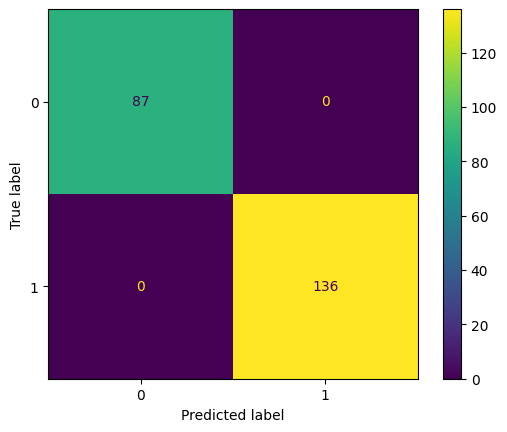

In [17]:
cross_validation_results(log_reg, X_train, y_train)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0


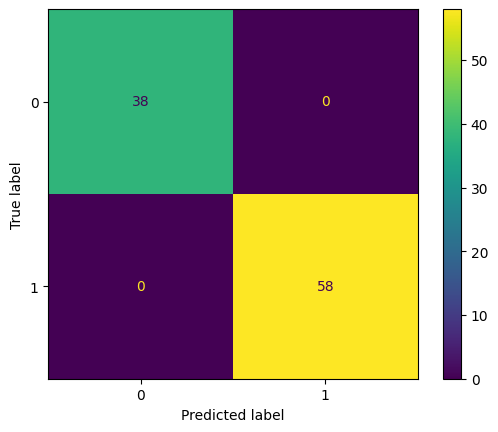

In [18]:
evaluate_on_test(log_reg, X_test,y_test)

### **No fine tuning**

In [26]:
lr_nf = LogisticRegression(random_state=42)

In [27]:
lr_nf.fit(X_train,y_train)

LogisticRegression(random_state=42)

Mean Test Precision:  0.9857142857142858
Mean Test Recall:  0.9928571428571429
Mean Test F1:  0.9888888888888889
Accuracy:  0.9865612648221344


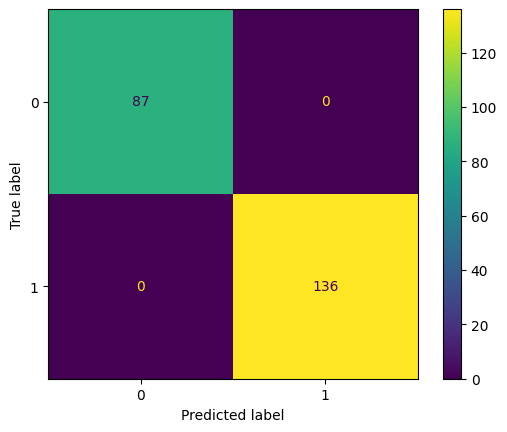

In [28]:
cross_validation_results(lr_nf, X_train, y_train)

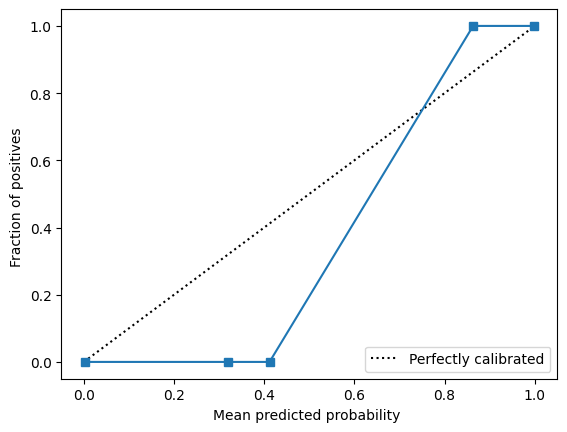

In [19]:
from sklearn.calibration import calibration_curve, CalibrationDisplay

y_prob = log_reg.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)
disp = CalibrationDisplay(prob_true, prob_pred, y_prob)
disp.plot()

## **AdaBoost**

In [20]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(learning_rate=1.0, n_estimators=50,random_state=42)

ada = ada.fit(X_train, y_train)

Mean Test Precision:  0.9861904761904763
Mean Test Recall:  0.9928571428571429
Mean Test F1:  0.9891443167305237
Accuracy:  0.9867588932806324


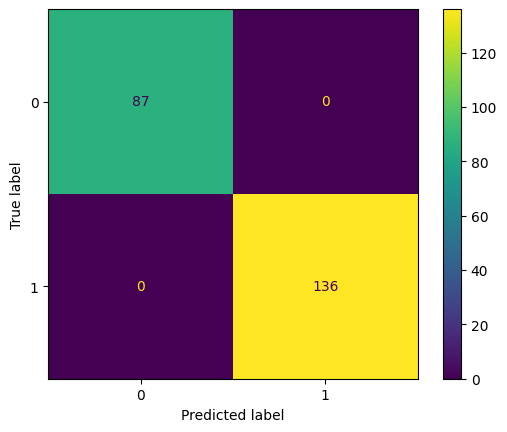

In [21]:
cross_validation_results(ada, X_train, y_train)

Accuracy:  0.9791666666666666
Precision:  0.9666666666666667
Recall:  1.0
F1:  0.983050847457627


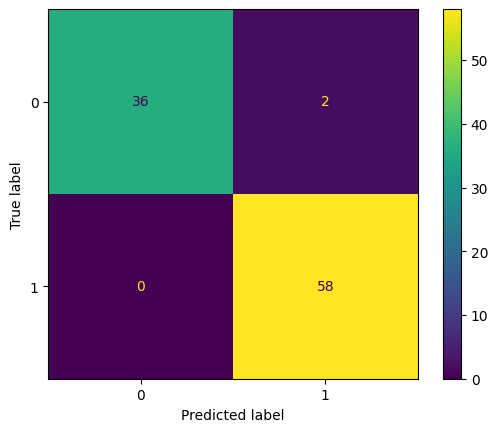

In [22]:
evaluate_on_test(ada, X_test, y_test)

### **No fine tuning**

In [29]:
ada_nf = AdaBoostClassifier(random_state=42)

In [30]:
ada_nf.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

Mean Test Precision:  0.9861904761904763
Mean Test Recall:  0.9928571428571429
Mean Test F1:  0.9891443167305237
Accuracy:  0.9867588932806324


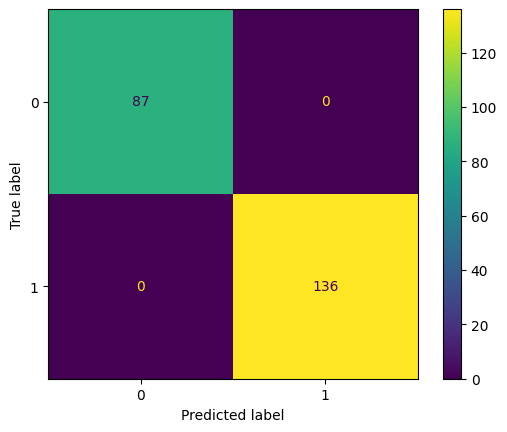

In [31]:
cross_validation_results(ada_nf, X_train, y_train)

## **SVC**

In [23]:
from sklearn.svm import SVC

svc = SVC(C=10, gamma=0.1,kernel='rbf', random_state=42)

svc = svc.fit(X_train,y_train)

Mean Test Precision:  0.9795238095238096
Mean Test Recall:  0.9857142857142858
Mean Test F1:  0.9822477650063858
Accuracy:  0.9780632411067194


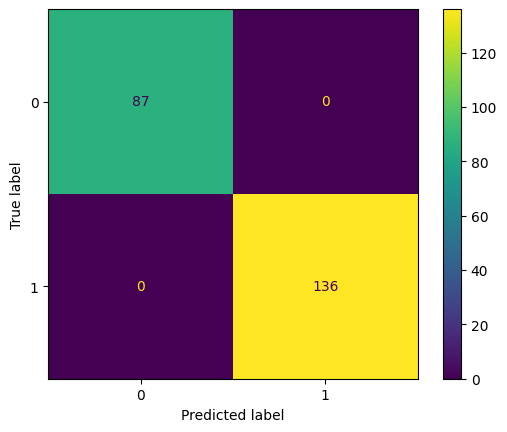

In [24]:
cross_validation_results(svc, X_train, y_train)

Accuracy:  0.9791666666666666
Precision:  0.9666666666666667
Recall:  1.0
F1:  0.983050847457627


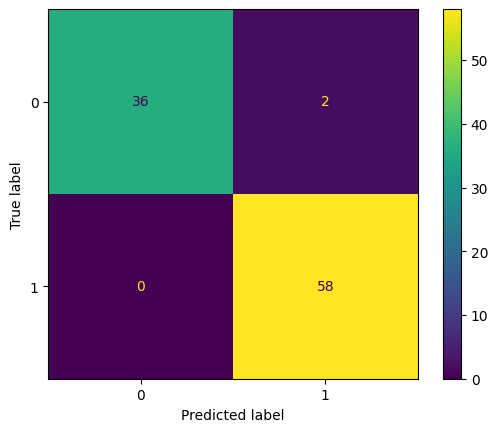

In [25]:
evaluate_on_test(svc, X_test, y_test)

### **No fine tuning**

In [32]:
svc_nf = SVC(random_state=42)

In [33]:
svc_nf.fit(X_train,y_train)

SVC(random_state=42)

Mean Test Precision:  0.9780219780219781
Mean Test Recall:  0.9780219780219781
Mean Test F1:  0.9774928774928776
Accuracy:  0.9731225296442687


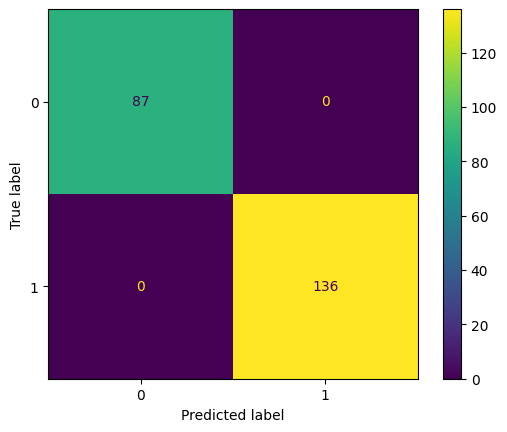

In [34]:
cross_validation_results(svc_nf, X_train, y_train)

## **Random Forest**

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

In [37]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Mean Test Precision:  0.9723076923076924
Mean Test Recall:  0.9780219780219781
Mean Test F1:  0.9743091518953589
Accuracy:  0.9685770750988141


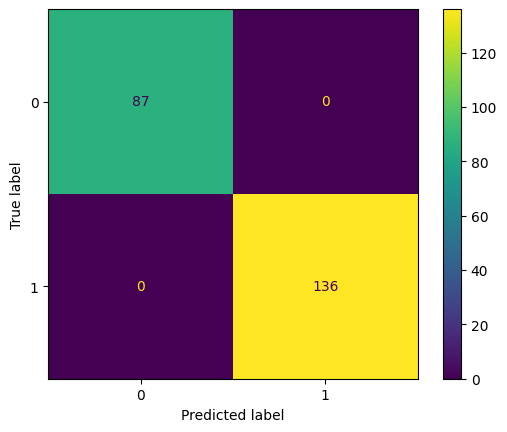

In [38]:
cross_validation_results(rf, X_train, y_train)

## **KNN**

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [40]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

Mean Test Precision:  0.9851648351648352
Mean Test Recall:  0.9417582417582417
Mean Test F1:  0.9618119658119658
Accuracy:  0.9553359683794467


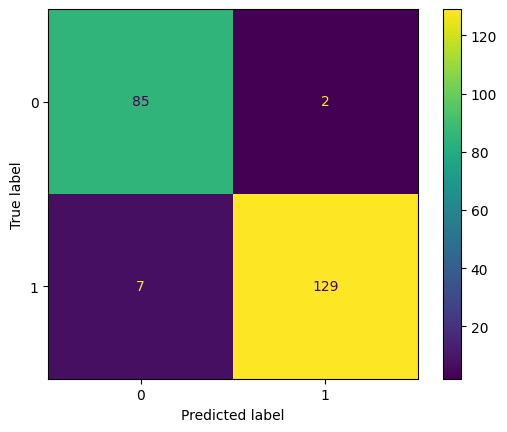

In [41]:
cross_validation_results(knn, X_train, y_train)